In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
house = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Question 1) Display the data types of each column using the attribute dtypes, then take a screenshot and submit it, include your code in the image.

In [3]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Question 2) Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True. Your output should look like this:

In [4]:
house.drop('id',axis=1,inplace=True)

In [5]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Question 3) use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe. Your output should look like this :

In [6]:
house.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

# Question 4) use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Your output should look like this with the code that produced it (the colors may be different ) :

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


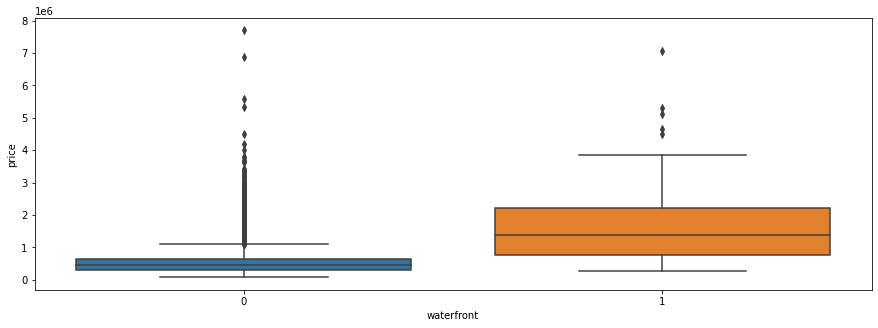

In [8]:
plt.figure(figsize=[15,5])
sns.boxplot(data=house,x='waterfront',y='price');

# Question 5) Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of the plot and the code used to generate it.

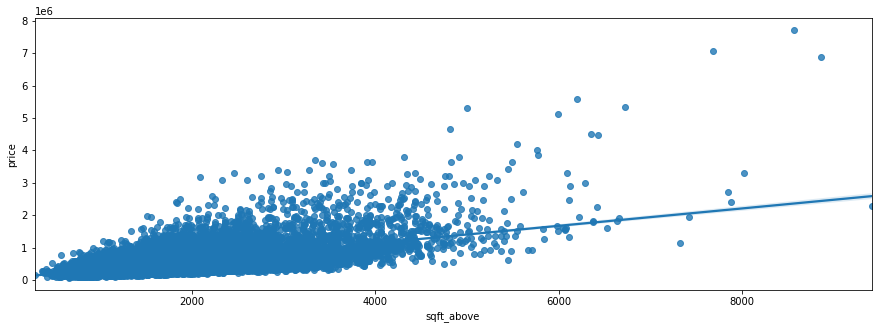

In [9]:
plt.figure(figsize=[15,5])
sns.regplot(data=house,x='sqft_above',y='price');

# Question 6) Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. 

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
X = np.array(house['sqft_living']).reshape((-1, 1))
y = np.array(house.price)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X,y)

LinearRegression()

In [14]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4928532179037931


In [15]:
print('intercept:', model.intercept_)

intercept: -43580.74309447396


In [16]:
print('slope:', model.coef_)

slope: [280.6235679]


In [17]:
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))

In [18]:
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [-43580.74309447]
slope: [[280.6235679]]


In [19]:
y_pred = new_model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[287555.06702451]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]


# Question 7) Fit a linear regression model to predict the 'price' using the list of features:

"floors"
"waterfront"
"lat"
"bedrooms"
"sqft_basement"
"view"
"bathrooms"
"sqft_living15"
"sqft_above"
"grade"
"sqft_living"
The calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [20]:
X = np.array(house[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(house.price)

In [21]:
model = LinearRegression().fit(X, y)

In [22]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print()
print('intercept:', model.intercept_)
print()
print('slope:', model.coef_)

coefficient of determination: 0.6577151058279325

intercept: -32393033.998162005

slope: [ 1.29402390e+02 -2.93506755e+04 -2.58576191e+04  6.44649626e+01
  6.70524927e+04 -3.47249675e+03  4.31579036e+00  6.49374277e+01
  8.21667080e+04  6.02163807e+05  6.73032296e+05]


In [23]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[283413.0766304  662377.8434901  305956.87442554 ... 304309.00758747
 428626.84540507 304107.09789879]


# Question 8) Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
X = np.array(house[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(house.price)
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [26]:
model = LinearRegression().fit(X_, y)

In [27]:
r_sq = model.score(X_, y)
intercept, coefficients = model.intercept_, model.coef_


In [28]:
y_pred = model.predict(X_)

In [29]:
print('coefficient of determination:', r_sq)
print()
print('intercept:', intercept)
print()
print('coefficients:', coefficients, sep='\n')
print()
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.7513467641290756

intercept: -4514999054.64413

coefficients:
[ 1.80008709e+10 -1.69708637e+06 -1.10869174e+06 -1.80008863e+10
 -2.35737625e+06  1.67483334e+06 -1.18731382e+03 -1.80008743e+10
 -6.72249870e+06 -2.93936401e+07  1.90741229e+08 -9.34320933e+00
  1.78716646e+01 -6.08551145e+00  8.12749553e+00 -1.96824262e+01
  5.75355434e+00 -1.12723732e+00  6.08852911e+00  3.31706592e+01
  1.71767170e+02  1.27812465e+02  1.38494921e+04  3.24646883e+04
  4.96575539e+01  7.59376434e+03 -6.69100781e+04 -4.74186583e+01
 -3.17972250e+01  7.56957014e+03 -1.75972200e+05  3.62603705e+04
  6.94704825e+02 -5.17974281e+00  2.33922812e+03 -1.24626844e+04
  9.09470892e+00 -8.94635201e-01  4.71301023e+02 -5.57569452e+04
  2.26630057e+04  1.15417266e+00 -1.31977472e+01 -1.95241680e+01
  1.14251709e+00  4.48495770e+00  1.81384041e+01 -1.62595034e+00
  1.88599213e+02  1.38249489e+03  9.56568311e+03  2.17459030e+01
 -6.49039745e+00  1.21627284e+04 -5.63118404e+04  4.79316064e

# Question 9) Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. Take a screenshot for your code and the R^2

In [30]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression


In [31]:
X = np.array(house[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(house.price)


In [32]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1)

In [33]:
rr = Ridge(alpha=0.1)
rr.fit(X, y)
w = rr.coef_

In [34]:
w

array([89.06914837])

In [35]:
coefficients

array(90.34019153)

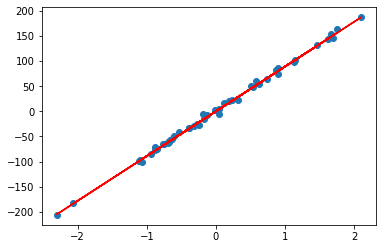

In [36]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red');

In [37]:
rr.score(X,y)

0.9977857946524787

# Question 10) Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [38]:
X = np.array(house[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(house.price).reshape(-1, 1)
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(y)



In [39]:
X_, y_, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1)

In [40]:
rr_poly = Ridge(alpha=0.1)
rr_poly.fit(X_, y_)
w = rr_poly.coef_
w

array([89.06914837])

In [41]:
rr.score(X_,y_)

0.9977857946524787